In [1]:
from atomphys import _ureg, Atom
import numpy as np
import matplotlib.pyplot as plt
from math import pi as π

_ureg.default_format = '~0.3gP'
c = _ureg.c
ε_0 = _ureg.ε_0

In [2]:
# fetch the NIST transition data for Mg+
Mg = Atom('mg ii')

In [3]:
# calculate the static scalar polarizability for the ground state
Mg.scalar_polarizability(0, 0)[0].to('h Hz/(V/cm)^2')

0.00857300074692271 <Unit('centimeter ** 2 * hertz * planck_constant / volt ** 2')>

In [4]:
# calculate the dynamic polarizability for the ground state at 1064 nm
λ = 1064 * _ureg.nm
α0 = Mg.scalar_polarizability(0, 2*π*c/λ)[0]
print('{:0.3g~P}'.format((α0/(2*c*ε_0)).to('h Hz/(W/cm^2)')))

1.73 Hz·cm²·h/W


/home/graum/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)
/home/graum/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order)


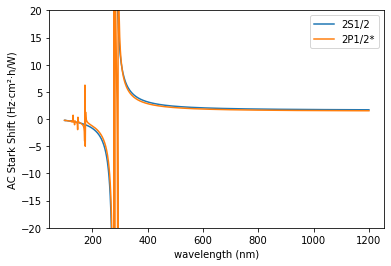

In [5]:
# make a figure of the AC stark shift 
λ = np.linspace(100,1200, 1000) * _ureg.nm

α0 = Mg.scalar_polarizability(0, 2*π*c/λ)
AC_stark0 = (α0/(2*c*ε_0)).to('h Hz/(W/cm^2)')

α1 = Mg.scalar_polarizability(1, 2*π*c/λ)
AC_stark1 = (α1/(2*c*ε_0)).to('h Hz/(W/cm^2)')

plt.plot(λ, AC_stark0, label=Mg.states[0].term)
plt.plot(λ, AC_stark1, label=Mg.states[1].term)

plt.legend()
plt.xlabel('wavelength ({:})'.format(λ.units))
plt.ylabel('AC Stark Shift ({:})'.format(AC_stark0.units))
plt.ylim(-20,20);